In [1]:
#standard packages
import pandas as pd
import numpy as np
import sklearn.datasets

#preprocessing
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


#results analysis
from sklearn.metrics import confusion_matrix, precision_score, classification_report

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

#pipeline
from sklearn.pipeline import Pipeline

#visualize
from sklearn.datasets import load_iris
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

#dataframe loaded
df = pd.read_csv('data.csv')


C:\Users\iansc\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#preprocessing and encoding columns

# numeric_features = ['duration',
#                     'credit_amount',
#                     'installment_commitment',
#                     'residence_since',
#                     'age',
#                     'existing_credits',
#                     'num_dependents']
# categorical_features = ['checking_status',
#                        'credit_history',
#                        'purpose',
#                        'savings_status',
#                       'employment',
#                       'personal_status',
#                       'other_parties',
#                        'property_magnitude',
#                        'other_payment_plans',
#                       'housing',
#                       'job',
#                       'own_telephone',
#                       'foreign_worker']


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Need to find a way to use this to reduce dimensionality and improve speed:
#         ('reduce_dims', PCA(n_components=4))





preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="object")),
    ('cat', categorical_transformer, selector(dtype_include="object"))
])

# TESTING

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#check for missing values
df.isnull().sum(axis = 0)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# Drop un-needed columns
df = df.drop(columns=['id','Unnamed: 32'])

In [6]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

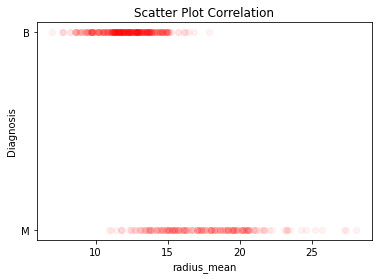

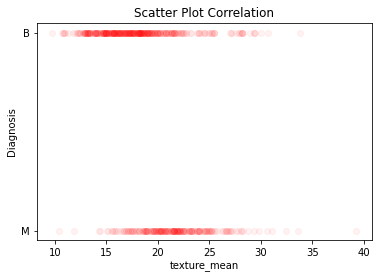

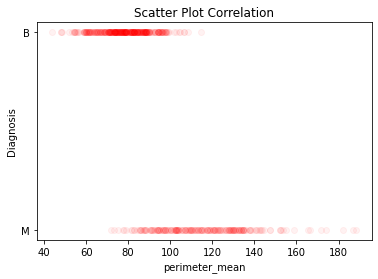

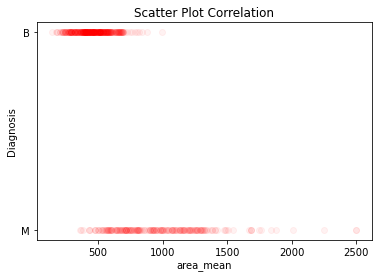

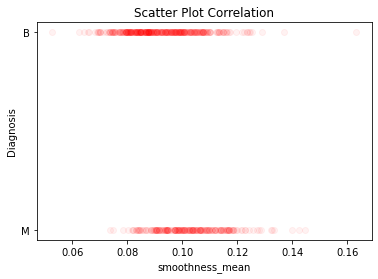

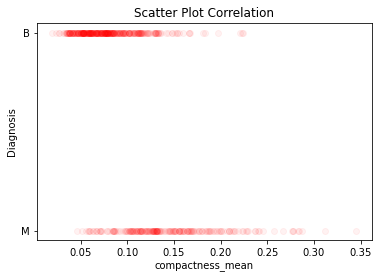

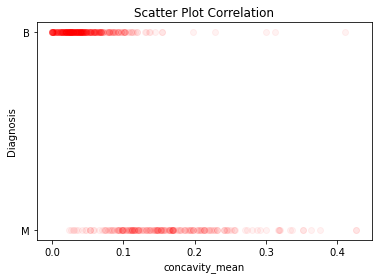

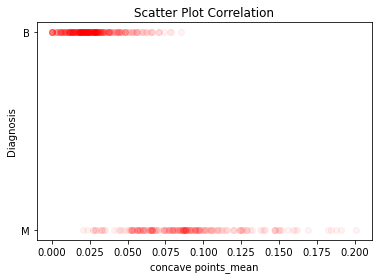

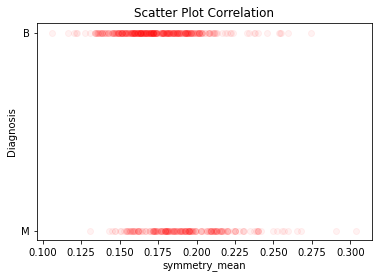

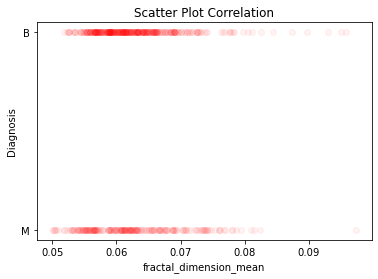

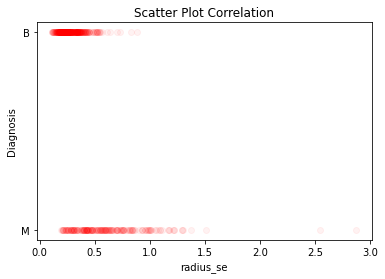

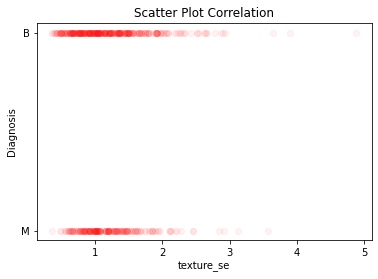

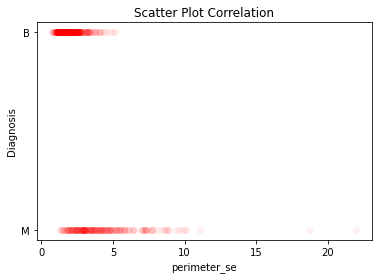

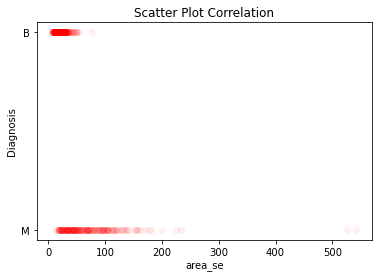

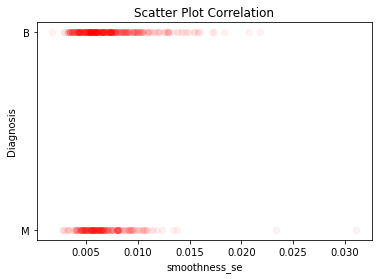

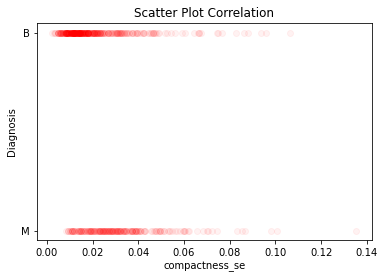

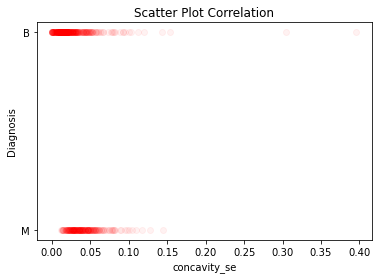

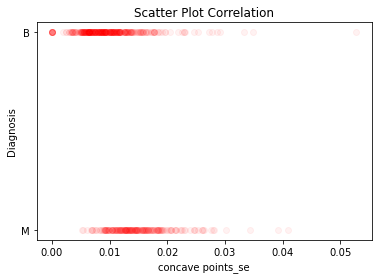

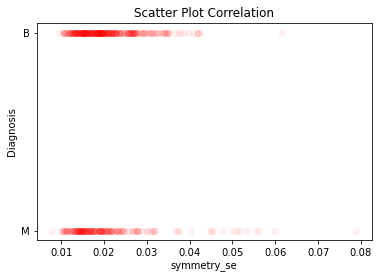

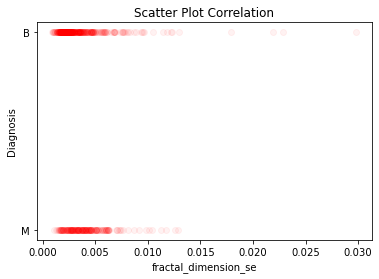

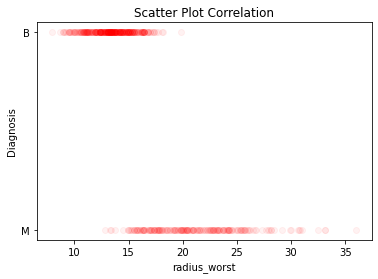

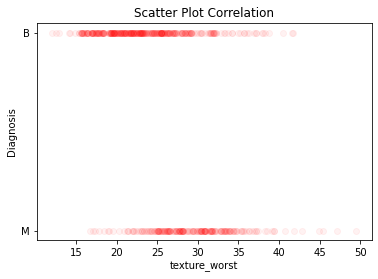

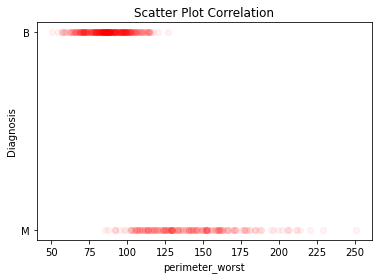

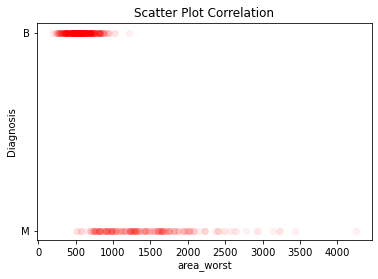

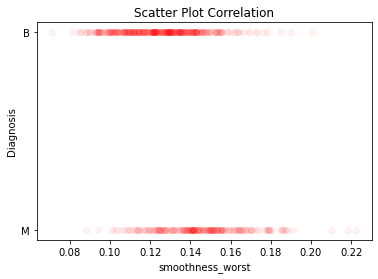

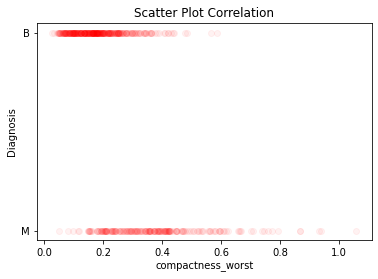

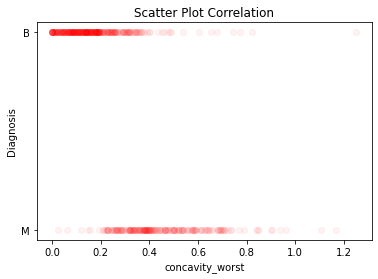

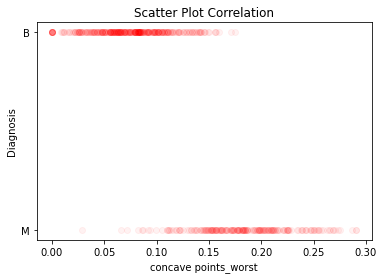

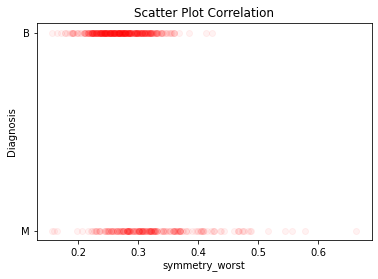

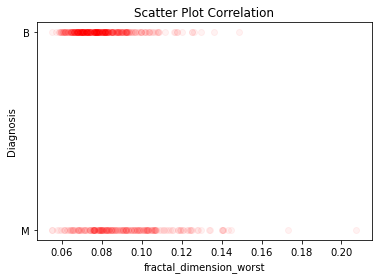

In [7]:
for column_number in range (1,31):
    plt.yticks(ticks=[0,1])
    plt.title('Scatter Plot Correlation')
    plt.xlabel(df.columns[column_number])
    plt.ylabel("Diagnosis")
    plt.scatter(df.iloc[:,column_number],df.iloc[:,0], color='red', alpha=0.05)
    plt.show()

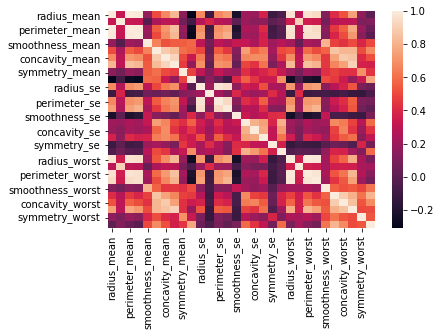

In [8]:
sns.heatmap(data= df.corr())

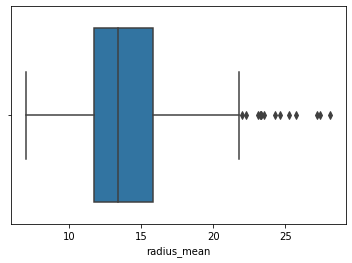

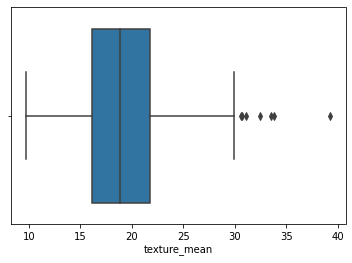

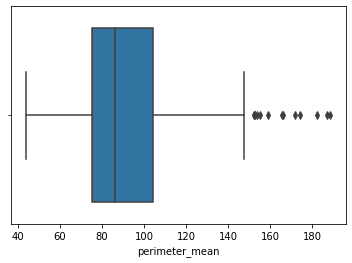

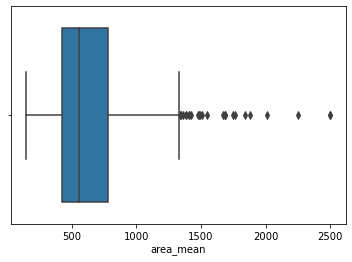

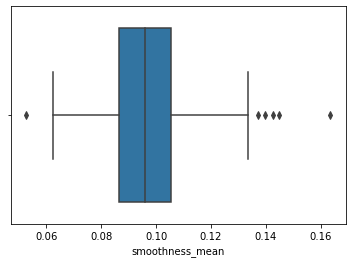

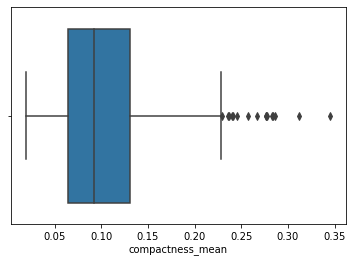

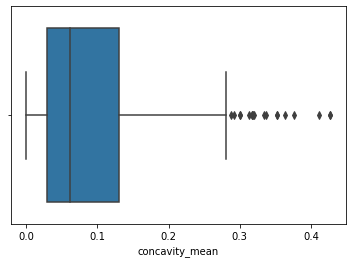

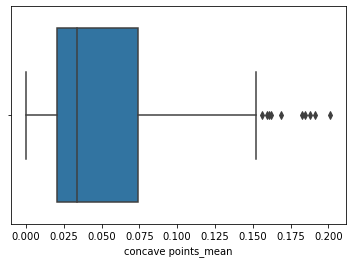

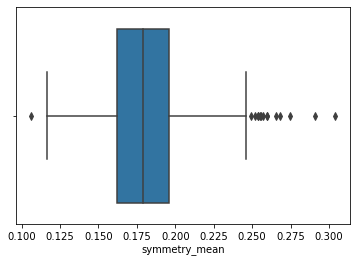

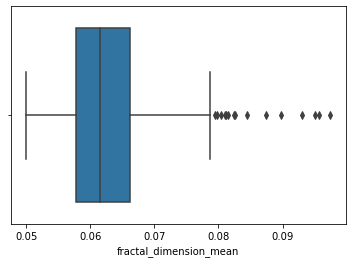

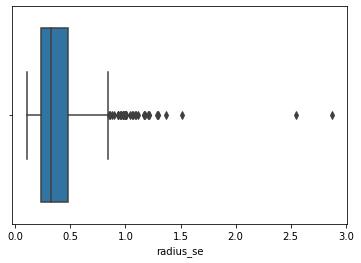

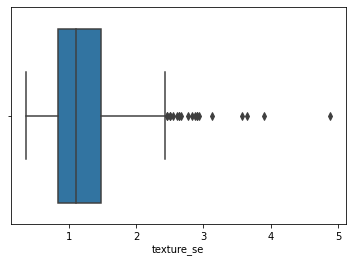

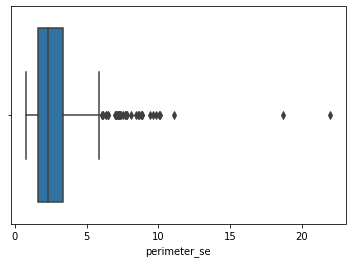

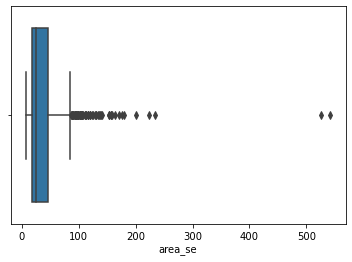

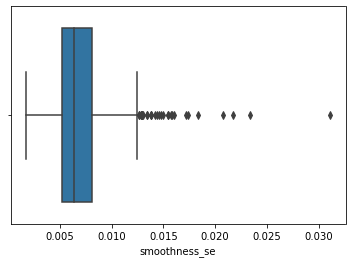

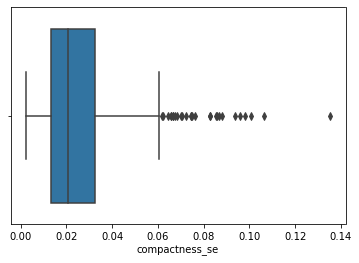

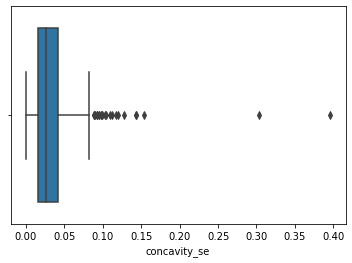

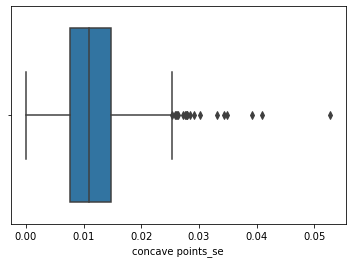

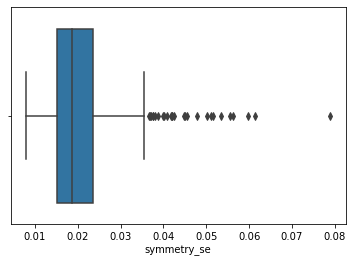

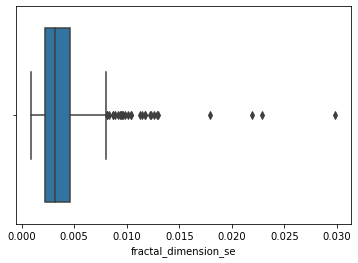

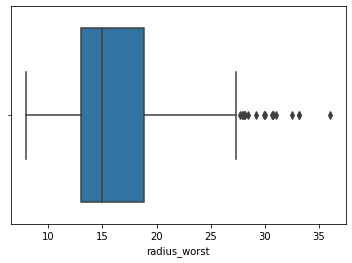

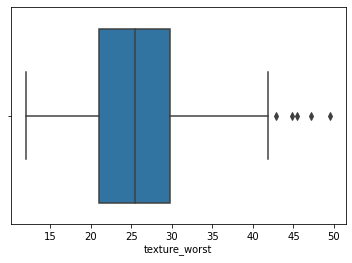

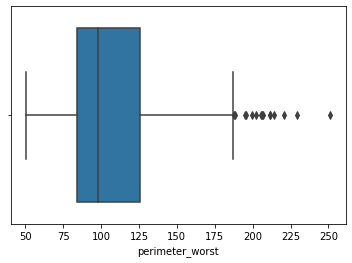

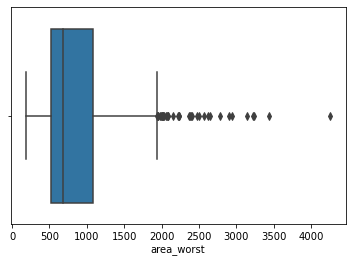

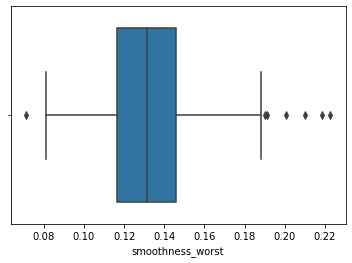

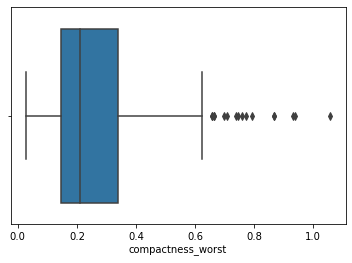

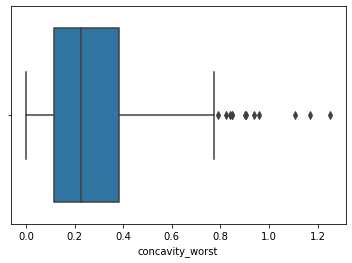

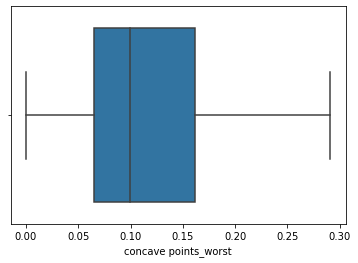

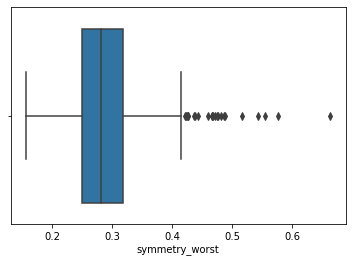

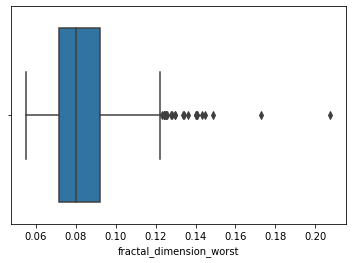

In [9]:
for column_number in range (1,31):
    sns.boxplot(x=df.columns[column_number], data= df)
    plt.show()

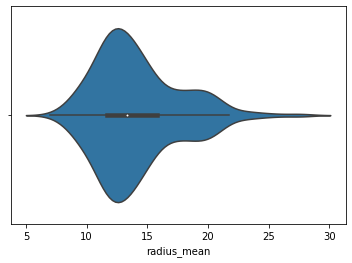

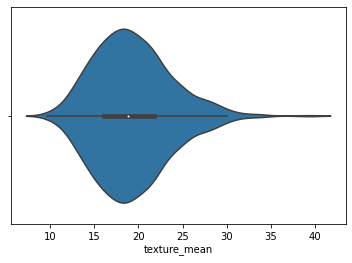

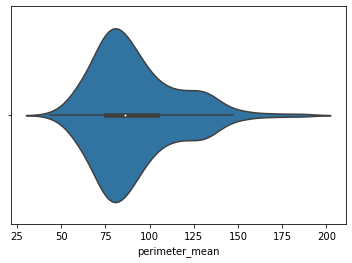

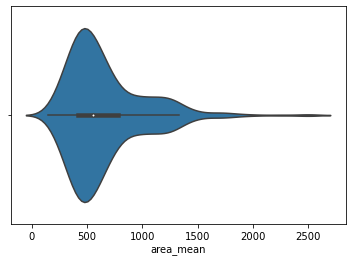

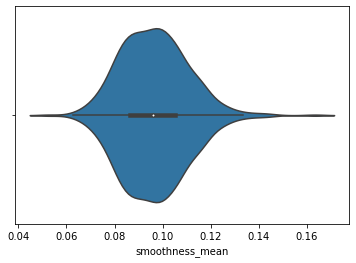

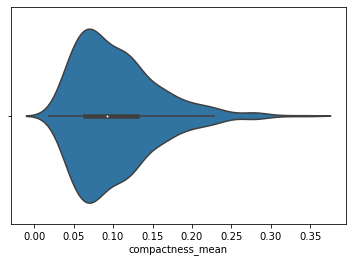

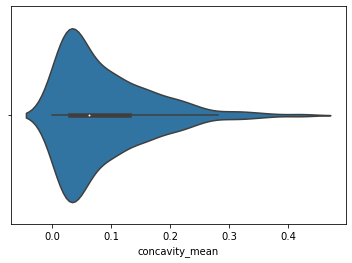

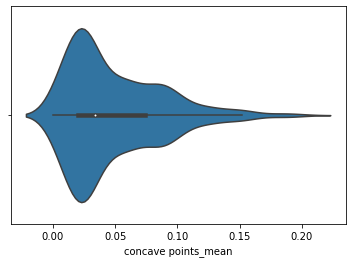

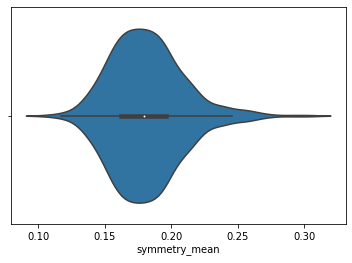

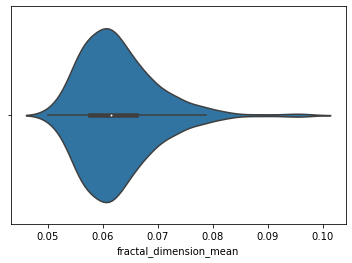

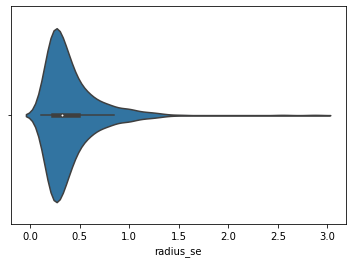

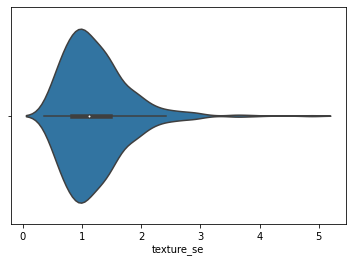

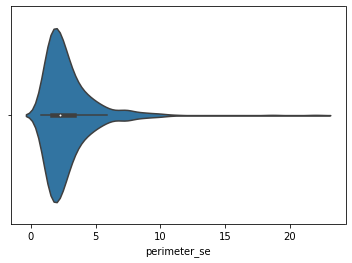

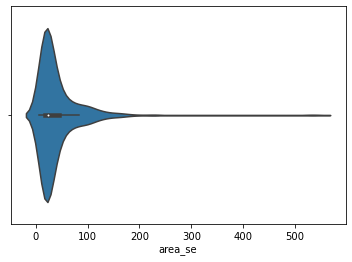

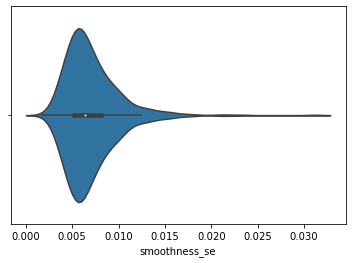

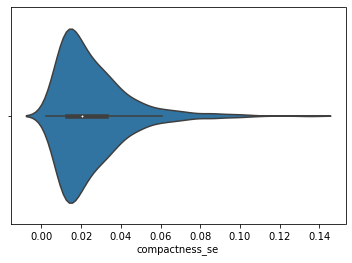

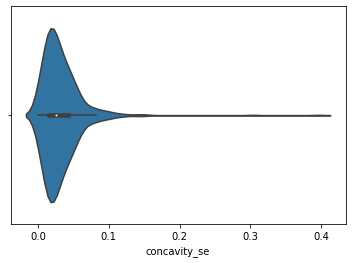

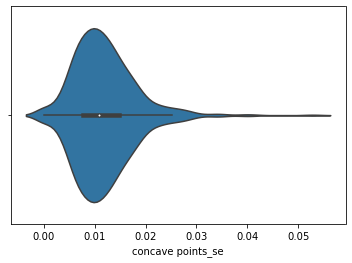

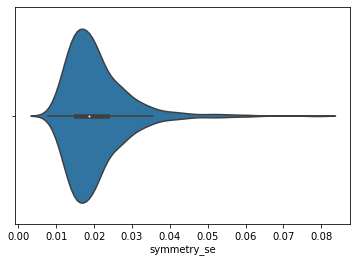

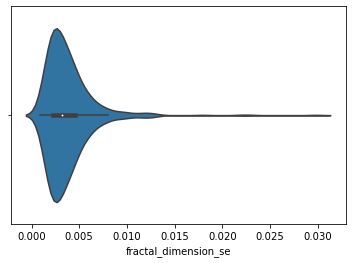

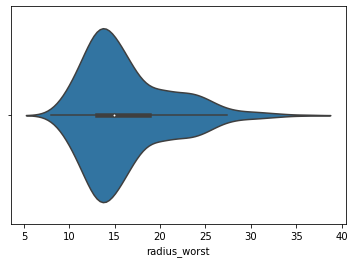

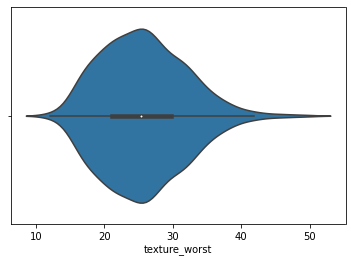

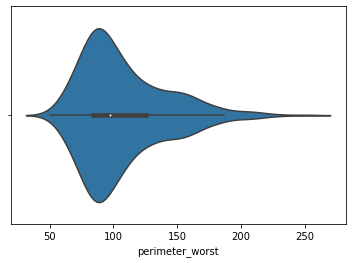

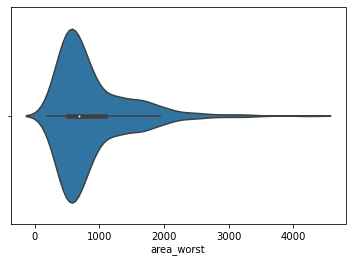

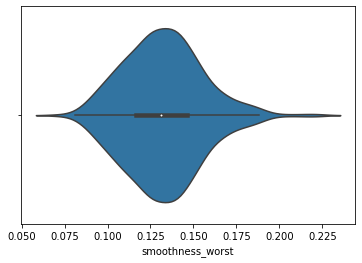

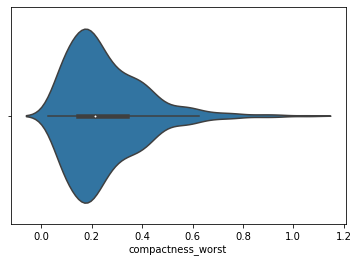

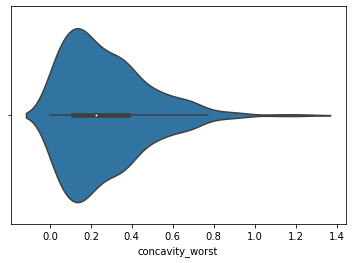

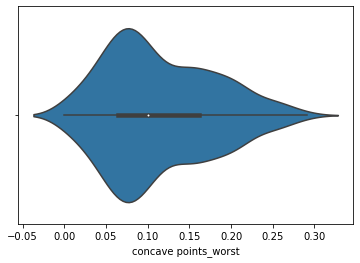

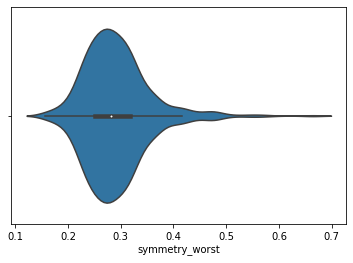

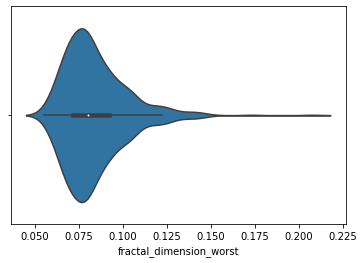

In [10]:
for column_number in range (1,31):
    sns.violinplot(x=df.columns[column_number], data= df)
    plt.show()

In [11]:
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
df.corr(method='pearson')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [13]:
y = df.iloc[:, 0:1]

X = df.drop('diagnosis',axis='columns')
X = X.iloc[:,:]
print(X)
X.info

# target_feature = ['diagnosis']

subset_feature = [
                'radius_mean',
#                 'texture_mean',
                'perimeter_mean',
                'area_mean',
#                 'smoothness_mean',
#                 'compactness_mean',
#                 'concavity_mean',
                'concave points_mean',
#                 'symmetry_mean',
#                 'fractal_dimension_mean',
#                 'radius_se',
#                 'texture_se',
#                 'perimeter_se',
#                 'area_se',
#                 'smoothness_se',
#                 'compactness_se',
#                 'concavity_se',
#                 'concave points_se',
#                 'symmetry_se',
#                 'fractal_dimension_se',
                'radius_worst',
#                 'texture_worst',
                'perimeter_worst',
                'area_worst',
#                 'smoothness_worst',
#                 'compactness_worst',
#                 'concavity_worst',
                'concave points_worst',
#                 'symmetry_worst',
#                 'fractal_dimension_worst',
                 ]

X = X[subset_feature]
X.info()

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [14]:
y.info

<bound method DataFrame.info of      diagnosis
0            1
1            1
2            1
3            1
4            1
..         ...
564          1
565          1
566          1
567          1
568          0

[569 rows x 1 columns]>

In [15]:
#Pipeline

# MODEL TYPES

# KNeighborsClassifier(n_neighbors=K)

# LogisticRegression(solver=lbfgs, C=C)
#     solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

# SVC(kernel='linear', C=C)
#     kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’)
#     degreeint, default=3 (for poly only)

# RandomForestClassifier(n_estimators=100, criterion='gini')

# DecisionTreeClassifier(criterion='gini', splitter='best')



model_choice = KNeighborsClassifier(n_neighbors=10, p=2)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                  ('classifier', model_choice)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cross_val_score(clf, X, y, scoring='accuracy').mean()

conf = confusion_matrix(y_test, y_pred)
print(conf)

print("Current model score: %.5f" % clf.score(X_test, y_test))


param_grid = dict(classifier__n_neighbors=[1,2,3,4,5,6,7,8,9,10],
                  classifier__p=[1,2])
# For future use - try using with PCA above
#     reduce_dims__n_components=[4,6,8]


grid = GridSearchCV(clf, param_grid=param_grid, cv=3, n_jobs=1, verbose=10, scoring= 'accuracy', return_train_score=True)
grid.fit(X, y)
print(grid.best_score_)
grid.cv_results_

#KNN - neighbours = 10, p = 2 was best choice, 94.737% accuracy

C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

[[66  2]
 [ 5 41]]
Current model score: 0.93860
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] classifier__n_neighbors=1, classifier__p=1 ......................
[CV]  classifier__n_neighbors=1, classifier__p=1, score=(train=1.000, test=0.926), total=   0.1s
[CV] classifier__n_neighbors=1, classifier__p=1 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=1, classifier__p=1, score=(train=1.000, test=0.937), total=   0.1s
[CV] classifier__n_neighbors=1, classifier__p=1 ......................
[CV]  classifier__n_neighbors=1, classifier__p=1, score=(train=1.000, test=0.931), total=   0.1s
[CV] classifier__n_neighbors=1, classifier__p=2 ......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=1, classifier__p=2, score=(train=1.000, test=0.926), total=   0.1s
[CV] classifier__n_neighbors=1, classifier__p=2 ......................
[CV]  classifier__n_neighbors=1, classifier__p=2, score=(train=1.000, test=0.932), total=   0.1s
[CV] classifier__n_neighbors=1, classifier__p=2 ......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=1, classifier__p=2, score=(train=1.000, test=0.942), total=   0.1s
[CV] classifier__n_neighbors=2, classifier__p=1 ......................
[CV]  classifier__n_neighbors=2, classifier__p=1, score=(train=0.971, test=0.942), total=   0.1s
[CV] classifier__n_neighbors=2, classifier__p=1 ......................
[CV]  classifier__n_neighbors=2, classifier__p=1, score=(train=0.958, test=0.932), total=   0.1s
[CV] classifier__n_neighbors=2, classifier__p=1 ......................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.8s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.9s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

[CV]  classifier__n_neighbors=2, classifier__p=1, score=(train=0.968, test=0.963), total=   0.1s
[CV] classifier__n_neighbors=2, classifier__p=2 ......................
[CV]  classifier__n_neighbors=2, classifier__p=2, score=(train=0.979, test=0.916), total=   0.1s
[CV] classifier__n_neighbors=2, classifier__p=2 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=2, classifier__p=2, score=(train=0.955, test=0.932), total=   0.1s
[CV] classifier__n_neighbors=2, classifier__p=2 ......................
[CV]  classifier__n_neighbors=2, classifier__p=2, score=(train=0.968, test=0.968), total=   0.1s
[CV] classifier__n_neighbors=3, classifier__p=1 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=3, classifier__p=1, score=(train=0.982, test=0.921), total=   0.1s
[CV] classifier__n_neighbors=3, classifier__p=1 ......................
[CV]  classifier__n_neighbors=3, classifier__p=1, score=(train=0.966, test=0.953), total=   0.1s
[CV] classifier__n_neighbors=3, classifier__p=1 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=3, classifier__p=1, score=(train=0.968, test=0.958), total=   0.1s
[CV] classifier__n_neighbors=3, classifier__p=2 ......................
[CV]  classifier__n_neighbors=3, classifier__p=2, score=(train=0.984, test=0.926), total=   0.1s
[CV] classifier__n_neighbors=3, classifier__p=2 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=3, classifier__p=2, score=(train=0.960, test=0.953), total=   0.1s
[CV] classifier__n_neighbors=3, classifier__p=2 ......................
[CV]  classifier__n_neighbors=3, classifier__p=2, score=(train=0.971, test=0.968), total=   0.1s
[CV] classifier__n_neighbors=4, classifier__p=1 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=4, classifier__p=1, score=(train=0.971, test=0.926), total=   0.1s
[CV] classifier__n_neighbors=4, classifier__p=1 ......................
[CV]  classifier__n_neighbors=4, classifier__p=1, score=(train=0.960, test=0.947), total=   0.1s
[CV] classifier__n_neighbors=4, classifier__p=1 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=4, classifier__p=1, score=(train=0.963, test=0.958), total=   0.1s
[CV] classifier__n_neighbors=4, classifier__p=2 ......................
[CV]  classifier__n_neighbors=4, classifier__p=2, score=(train=0.971, test=0.911), total=   0.1s
[CV] classifier__n_neighbors=4, classifier__p=2 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=4, classifier__p=2, score=(train=0.960, test=0.953), total=   0.1s
[CV] classifier__n_neighbors=4, classifier__p=2 ......................
[CV]  classifier__n_neighbors=4, classifier__p=2, score=(train=0.963, test=0.963), total=   0.1s
[CV] classifier__n_neighbors=5, classifier__p=1 ......................
[CV]  classifier__n_neighbors=5, classifier__p=1, score=(train=0.974, test=0.921), total=   0.1s

C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)



[CV] classifier__n_neighbors=5, classifier__p=1 ......................
[CV]  classifier__n_neighbors=5, classifier__p=1, score=(train=0.960, test=0.958), total=   0.1s
[CV] classifier__n_neighbors=5, classifier__p=1 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__p=1, score=(train=0.963, test=0.963), total=   0.0s
[CV] classifier__n_neighbors=5, classifier__p=2 ......................
[CV]  classifier__n_neighbors=5, classifier__p=2, score=(train=0.976, test=0.932), total=   0.1s
[CV] classifier__n_neighbors=5, classifier__p=2 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__p=2, score=(train=0.955, test=0.963), total=   0.1s
[CV] classifier__n_neighbors=5, classifier__p=2 ......................
[CV]  classifier__n_neighbors=5, classifier__p=2, score=(train=0.966, test=0.963), total=   0.1s
[CV] classifier__n_neighbors=6, classifier__p=1 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=6, classifier__p=1, score=(train=0.963, test=0.916), total=   0.1s
[CV] classifier__n_neighbors=6, classifier__p=1 ......................
[CV]  classifier__n_neighbors=6, classifier__p=1, score=(train=0.953, test=0.953), total=   0.1s
[CV] classifier__n_neighbors=6, classifier__p=1 ......................

C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)



[CV]  classifier__n_neighbors=6, classifier__p=1, score=(train=0.961, test=0.963), total=   0.1s
[CV] classifier__n_neighbors=6, classifier__p=2 ......................
[CV]  classifier__n_neighbors=6, classifier__p=2, score=(train=0.963, test=0.932), total=   0.0s


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] classifier__n_neighbors=6, classifier__p=2 ......................
[CV]  classifier__n_neighbors=6, classifier__p=2, score=(train=0.953, test=0.958), total=   0.1s
[CV] classifier__n_neighbors=6, classifier__p=2 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=6, classifier__p=2, score=(train=0.958, test=0.958), total=   0.1s
[CV] classifier__n_neighbors=7, classifier__p=1 ......................
[CV]  classifier__n_neighbors=7, classifier__p=1, score=(train=0.966, test=0.926), total=   0.1s
[CV] classifier__n_neighbors=7, classifier__p=1 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=7, classifier__p=1, score=(train=0.953, test=0.947), total=   0.0s
[CV] classifier__n_neighbors=7, classifier__p=1 ......................
[CV]  classifier__n_neighbors=7, classifier__p=1, score=(train=0.955, test=0.974), total=   0.1s
[CV] classifier__n_neighbors=7, classifier__p=2 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=7, classifier__p=2, score=(train=0.963, test=0.926), total=   0.1s
[CV] classifier__n_neighbors=7, classifier__p=2 ......................
[CV]  classifier__n_neighbors=7, classifier__p=2, score=(train=0.950, test=0.953), total=   0.1s
[CV] classifier__n_neighbors=7, classifier__p=2 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=7, classifier__p=2, score=(train=0.953, test=0.963), total=   0.1s
[CV] classifier__n_neighbors=8, classifier__p=1 ......................
[CV]  classifier__n_neighbors=8, classifier__p=1, score=(train=0.963, test=0.921), total=   0.1s
[CV] classifier__n_neighbors=8, classifier__p=1 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=8, classifier__p=1, score=(train=0.950, test=0.953), total=   0.1s
[CV] classifier__n_neighbors=8, classifier__p=1 ......................
[CV]  classifier__n_neighbors=8, classifier__p=1, score=(train=0.953, test=0.958), total=   0.1s
[CV] classifier__n_neighbors=8, classifier__p=2 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=8, classifier__p=2, score=(train=0.958, test=0.937), total=   0.1s
[CV] classifier__n_neighbors=8, classifier__p=2 ......................
[CV]  classifier__n_neighbors=8, classifier__p=2, score=(train=0.955, test=0.953), total=   0.1s
[CV] classifier__n_neighbors=8, classifier__p=2 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=8, classifier__p=2, score=(train=0.953, test=0.968), total=   0.1s
[CV] classifier__n_neighbors=9, classifier__p=1 ......................
[CV]  classifier__n_neighbors=9, classifier__p=1, score=(train=0.960, test=0.926), total=   0.1s
[CV] classifier__n_neighbors=9, classifier__p=1 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=9, classifier__p=1, score=(train=0.953, test=0.953), total=   0.0s
[CV] classifier__n_neighbors=9, classifier__p=1 ......................
[CV]  classifier__n_neighbors=9, classifier__p=1, score=(train=0.955, test=0.958), total=   0.1s
[CV] classifier__n_neighbors=9, classifier__p=2 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=9, classifier__p=2, score=(train=0.958, test=0.932), total=   0.1s
[CV] classifier__n_neighbors=9, classifier__p=2 ......................
[CV]  classifier__n_neighbors=9, classifier__p=2, score=(train=0.950, test=0.953), total=   0.0s
[CV] classifier__n_neighbors=9, classifier__p=2 ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=9, classifier__p=2, score=(train=0.947, test=0.968), total=   0.1s
[CV] classifier__n_neighbors=10, classifier__p=1 .....................
[CV]  classifier__n_neighbors=10, classifier__p=1, score=(train=0.958, test=0.926), total=   0.1s
[CV] classifier__n_neighbors=10, classifier__p=1 .....................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__p=1, score=(train=0.947, test=0.953), total=   0.1s
[CV] classifier__n_neighbors=10, classifier__p=1 .....................
[CV]  classifier__n_neighbors=10, classifier__p=1, score=(train=0.958, test=0.958), total=   0.1s
[CV] classifier__n_neighbors=10, classifier__p=2 .....................
[CV]  classifier__n_neighbors=10, classifier__p=2, score=(train=0.953, test=0.926), total=   0.1s
[CV] classifier__n_neighbors=10, classifier__p=2 .....................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__p=2, score=(train=0.960, test=0.958), total=   0.1s
[CV] classifier__n_neighbors=10, classifier__p=2 .....................
[CV]  classifier__n_neighbors=10, classifier__p=2, score=(train=0.958, test=0.974), total=   0.1s
0.9525851666202544


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    7.9s finished
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


{'mean_fit_time': array([0.04015978, 0.0334661 , 0.03779356, 0.03997294, 0.04037396,
        0.04456075, 0.04059124, 0.04747001, 0.0441161 , 0.0467418 ,
        0.04586522, 0.04239027, 0.03490734, 0.04174606, 0.04474767,
        0.05483286, 0.03808928, 0.04512676, 0.03746756, 0.04347229]),
 'std_fit_time': array([0.00352112, 0.00366842, 0.00083341, 0.00224678, 0.00291328,
        0.00734285, 0.0002969 , 0.00764648, 0.01415371, 0.01224079,
        0.00923633, 0.0130484 , 0.00721998, 0.01177157, 0.0021695 ,
        0.00779394, 0.0059341 , 0.01257065, 0.00314599, 0.00656483]),
 'mean_score_time': array([0.0361352 , 0.04707829, 0.02239601, 0.02656595, 0.02726301,
        0.03241714, 0.02868605, 0.04201174, 0.03814069, 0.04015716,
        0.03136468, 0.03652581, 0.01803231, 0.0358789 , 0.03366089,
        0.032178  , 0.01724513, 0.03416308, 0.0316507 , 0.03448296]),
 'std_score_time': array([0.00527984, 0.01680482, 0.00575567, 0.00247066, 0.00722444,
        0.00589866, 0.01060427, 0.014789

In [16]:

model_choice = RandomForestClassifier(n_estimators=400, criterion='entropy', random_state=0)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                  ('classifier', model_choice)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cross_val_score(clf, X, y, scoring='accuracy').mean()

conf = confusion_matrix(y_test, y_pred)
print(conf)

print("Current model score: %.5f" % clf.score(X_test, y_test))


param_grid = dict(classifier__n_estimators=[1,10,100,200,400],
                  classifier__criterion=['gini','entropy'])
# For future use - try using with PCA above
#     reduce_dims__n_components=[4,6,8]


grid = GridSearchCV(clf, param_grid=param_grid, cv=3, n_jobs=1, verbose=10, scoring= 'accuracy', return_train_score=True)
grid.fit(X, y)
print(grid.best_score_)
grid.cv_results_

#Random Forest Classifier - estimators = 400, criterion = entropy was best choice, 94.737% accuracy

C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

[[68  5]
 [ 4 37]]
Current model score: 0.92105
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] classifier__criterion=gini, classifier__n_estimators=1 ..........
[CV]  classifier__criterion=gini, classifier__n_estimators=1, score=(train=0.974, test=0.921), total=   0.0s
[CV] classifier__criterion=gini, classifier__n_estimators=1 ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),


[CV]  classifier__criterion=gini, classifier__n_estimators=1, score=(train=0.974, test=0.963), total=   0.0s
[CV] classifier__criterion=gini, classifier__n_estimators=1 ..........
[CV]  classifier__criterion=gini, classifier__n_estimators=1, score=(train=0.961, test=0.952), total=   0.0s
[CV] classifier__criterion=gini, classifier__n_estimators=10 .........


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s


[CV]  classifier__criterion=gini, classifier__n_estimators=10, score=(train=0.997, test=0.916), total=   0.1s
[CV] classifier__criterion=gini, classifier__n_estimators=10 .........
[CV]  classifier__criterion=gini, classifier__n_estimators=10, score=(train=0.992, test=0.958), total=   0.1s
[CV] classifier__criterion=gini, classifier__n_estimators=10 .........


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=gini, classifier__n_estimators=10, score=(train=0.992, test=0.958), total=   0.1s
[CV] classifier__criterion=gini, classifier__n_estimators=100 ........
[CV]  classifier__criterion=gini, classifier__n_estimators=100, score=(train=1.000, test=0.932), total=   0.6s
[CV] classifier__criterion=gini, classifier__n_estimators=100 ........


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.1s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=gini, classifier__n_estimators=100, score=(train=1.000, test=0.958), total=   0.5s
[CV] classifier__criterion=gini, classifier__n_estimators=100 ........


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.6s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=gini, classifier__n_estimators=100, score=(train=1.000, test=0.958), total=   0.5s
[CV] classifier__criterion=gini, classifier__n_estimators=200 ........


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.2s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=gini, classifier__n_estimators=200, score=(train=1.000, test=0.926), total=   1.0s
[CV] classifier__criterion=gini, classifier__n_estimators=200 ........


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=gini, classifier__n_estimators=200, score=(train=1.000, test=0.958), total=   1.1s
[CV] classifier__criterion=gini, classifier__n_estimators=200 ........


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=gini, classifier__n_estimators=200, score=(train=1.000, test=0.958), total=   1.0s
[CV] classifier__criterion=gini, classifier__n_estimators=400 ........


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=gini, classifier__n_estimators=400, score=(train=1.000, test=0.926), total=   1.9s
[CV] classifier__criterion=gini, classifier__n_estimators=400 ........


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=gini, classifier__n_estimators=400, score=(train=1.000, test=0.958), total=   1.9s
[CV] classifier__criterion=gini, classifier__n_estimators=400 ........


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=gini, classifier__n_estimators=400, score=(train=1.000, test=0.958), total=   2.1s
[CV] classifier__criterion=entropy, classifier__n_estimators=1 .......
[CV]  classifier__criterion=entropy, classifier__n_estimators=1, score=(train=0.971, test=0.900), total=   0.0s
[CV] classifier__criterion=entropy, classifier__n_estimators=1 .......
[CV]  classifier__criterion=entropy, classifier__n_estimators=1, score=(train=0.979, test=0.953), total=   0.1s
[CV] classifier__criterion=entropy, classifier__n_estimators=1 .......
[CV]  classifier__criterion=entropy, classifier__n_estimators=1, score=(train=0.974, test=0.931), total=   0.0s
[CV] classifier__criterion=entropy, classifier__n_estimators=10 ......

C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)



[CV]  classifier__criterion=entropy, classifier__n_estimators=10, score=(train=0.995, test=0.926), total=   0.1s
[CV] classifier__criterion=entropy, classifier__n_estimators=10 ......
[CV]  classifier__criterion=entropy, classifier__n_estimators=10, score=(train=0.995, test=0.942), total=   0.1s
[CV] classifier__criterion=entropy, classifier__n_estimators=10 ......

C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)



[CV]  classifier__criterion=entropy, classifier__n_estimators=10, score=(train=0.992, test=0.968), total=   0.1s
[CV] classifier__criterion=entropy, classifier__n_estimators=100 .....


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=entropy, classifier__n_estimators=100, score=(train=1.000, test=0.926), total=   0.6s
[CV] classifier__criterion=entropy, classifier__n_estimators=100 .....


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=entropy, classifier__n_estimators=100, score=(train=1.000, test=0.968), total=   0.6s
[CV] classifier__criterion=entropy, classifier__n_estimators=100 .....


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=entropy, classifier__n_estimators=100, score=(train=1.000, test=0.952), total=   0.6s
[CV] classifier__criterion=entropy, classifier__n_estimators=200 .....


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=entropy, classifier__n_estimators=200, score=(train=1.000, test=0.926), total=   1.1s
[CV] classifier__criterion=entropy, classifier__n_estimators=200 .....


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=entropy, classifier__n_estimators=200, score=(train=1.000, test=0.963), total=   1.1s
[CV] classifier__criterion=entropy, classifier__n_estimators=200 .....


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=entropy, classifier__n_estimators=200, score=(train=1.000, test=0.952), total=   0.9s
[CV] classifier__criterion=entropy, classifier__n_estimators=400 .....


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=entropy, classifier__n_estimators=400, score=(train=1.000, test=0.932), total=   1.6s
[CV] classifier__criterion=entropy, classifier__n_estimators=400 .....


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=entropy, classifier__n_estimators=400, score=(train=1.000, test=0.968), total=   1.7s
[CV] classifier__criterion=entropy, classifier__n_estimators=400 .....


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__criterion=entropy, classifier__n_estimators=400, score=(train=1.000, test=0.952), total=   2.1s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   23.4s finished
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.9507936507936506


{'mean_fit_time': array([0.03474267, 0.08955129, 0.49292898, 0.93931969, 1.84557486,
        0.04077617, 0.0977718 , 0.55367637, 0.98065869, 1.69641821]),
 'std_fit_time': array([0.00316679, 0.02321609, 0.05026513, 0.04878442, 0.02917904,
        0.00517726, 0.02582006, 0.02547485, 0.10271543, 0.21716053]),
 'mean_score_time': array([0.01001453, 0.02235436, 0.03184565, 0.05759565, 0.12725465,
        0.00519872, 0.0124553 , 0.037304  , 0.05777828, 0.11449321]),
 'std_score_time': array([0.00317919, 0.00401798, 0.01219594, 0.01016132, 0.04777242,
        0.00451572, 0.0033146 , 0.00405254, 0.00652283, 0.01962489]),
 'param_classifier__criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'entropy',
                    'entropy', 'entropy', 'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_classifier__n_estimators': masked_array(

In [17]:

model_choice = SVC(kernel='linear', C=10, random_state=0)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                  ('classifier', model_choice)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cross_val_score(clf, X, y, scoring='accuracy').mean()

conf = confusion_matrix(y_test, y_pred)
print(conf)

print("Current model score: %.5f" % clf.score(X_test, y_test))


param_grid = dict(classifier__C=[0.1,0.2,0.3,0.4,0.5,1,10,20,50,100],
                  classifier__kernel=['linear','poly','rbf'])
# For future use - try using with PCA above
#     reduce_dims__n_components=[4,6,8]


grid = GridSearchCV(clf, param_grid=param_grid, cv=3, n_jobs=1, verbose=10, scoring= 'accuracy', return_train_score=True)
grid.fit(X, y)
print(grid.best_score_)
grid.cv_results_

#SVC - kernal = linear, C = 50 was best choice, 97.368% accuracy

C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[[76  1]
 [ 3 34]]
Current model score: 0.96491
Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] classifier__C=0.1, classifier__kernel=linear ....................
[CV]  classifier__C=0.1, classifier__kernel=linear, score=(train=0.947, test=0.932), total=   0.0s
[CV] classifier__C=0.1, classifier__kernel=linear ....................
[CV]  classifier__C=0.1, classifier__kernel=linear, score=(train=0.942, test=0.953), total=   0.0s
[CV] classifier__C=0.1, classifier__kernel=linear ....................
[CV]  classifier__C=0.1, classifier__kernel=linear, score=(train=0.950, test=0.947), total=   0.0s


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
C:\U

[CV] classifier__C=0.1, classifier__kernel=poly ......................
[CV]  classifier__C=0.1, classifier__kernel=poly, score=(train=0.852, test=0.789), total=   0.1s
[CV] classifier__C=0.1, classifier__kernel=poly ......................
[CV]  classifier__C=0.1, classifier__kernel=poly, score=(train=0.828, test=0.821), total=   0.1s
[CV] classifier__C=0.1, classifier__kernel=poly ......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=0.1, classifier__kernel=poly, score=(train=0.832, test=0.905), total=   0.1s
[CV] classifier__C=0.1, classifier__kernel=rbf .......................
[CV]  classifier__C=0.1, classifier__kernel=rbf, score=(train=0.942, test=0.905), total=   0.1s
[CV] classifier__C=0.1, classifier__kernel=rbf .......................
[CV]  classifier__C=0.1, classifier__kernel=rbf, score=(train=0.931, test=0.947), total=   0.0s
[CV] classifier__C=0.1, classifier__kernel=rbf .......................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.5s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=0.1, classifier__kernel=rbf, score=(train=0.937, test=0.947), total=   0.1s
[CV] classifier__C=0.2, classifier__kernel=linear ....................
[CV]  classifier__C=0.2, classifier__kernel=linear, score=(train=0.955, test=0.932), total=   0.0s
[CV] classifier__C=0.2, classifier__kernel=linear ....................
[CV]  classifier__C=0.2, classifier__kernel=linear, score=(train=0.945, test=0.947), total=   0.1s
[CV] classifier__C=0.2, classifier__kernel=linear ....................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.6s remaining:    0.0s
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

[CV]  classifier__C=0.2, classifier__kernel=linear, score=(train=0.950, test=0.942), total=   0.1s
[CV] classifier__C=0.2, classifier__kernel=poly ......................
[CV]  classifier__C=0.2, classifier__kernel=poly, score=(train=0.865, test=0.805), total=   0.1s
[CV] classifier__C=0.2, classifier__kernel=poly ......................
[CV]  classifier__C=0.2, classifier__kernel=poly, score=(train=0.858, test=0.832), total=   0.0s
[CV] classifier__C=0.2, classifier__kernel=poly ......................
[CV]  classifier__C=0.2, classifier__kernel=poly, score=(train=0.855, test=0.931), total=   0.0s
[CV] classifier__C=0.2, classifier__kernel=rbf .......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=0.2, classifier__kernel=rbf, score=(train=0.942, test=0.921), total=   0.1s
[CV] classifier__C=0.2, classifier__kernel=rbf .......................
[CV]  classifier__C=0.2, classifier__kernel=rbf, score=(train=0.939, test=0.953), total=   0.1s
[CV] classifier__C=0.2, classifier__kernel=rbf .......................
[CV]  classifier__C=0.2, classifier__kernel=rbf, score=(train=0.939, test=0.952), total=   0.1s
[CV] classifier__C=0.3, classifier__kernel=linear ....................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=0.3, classifier__kernel=linear, score=(train=0.958, test=0.926), total=   0.1s
[CV] classifier__C=0.3, classifier__kernel=linear ....................
[CV]  classifier__C=0.3, classifier__kernel=linear, score=(train=0.953, test=0.953), total=   0.1s
[CV] classifier__C=0.3, classifier__kernel=linear ....................
[CV]  classifier__C=0.3, classifier__kernel=linear, score=(train=0.945, test=0.942), total=   0.0s
[CV] classifier__C=0.3, classifier__kernel=poly ......................
[CV]  classifier__C=0.3, classifier__kernel=poly, score=(train=0.873, test=0.826), total=   0.0s
[CV] classifier__C=0.3, classifier__kernel=poly ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=0.3, classifier__kernel=poly, score=(train=0.863, test=0.842), total=   0.1s
[CV] classifier__C=0.3, classifier__kernel=poly ......................
[CV]  classifier__C=0.3, classifier__kernel=poly, score=(train=0.855, test=0.931), total=   0.1s
[CV] classifier__C=0.3, classifier__kernel=rbf .......................
[CV]  classifier__C=0.3, classifier__kernel=rbf, score=(train=0.945, test=0.921), total=   0.0s
[CV] classifier__C=0.3, classifier__kernel=rbf .......................
[CV]  classifier__C=0.3, classifier__kernel=rbf, score=(train=0.939, test=0.953), total=   0.0s
[CV] classifier__C=0.3, classifier__kernel=rbf .......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[CV]  classifier__C=0.3, classifier__kernel=rbf, score=(train=0.939, test=0.963), total=   0.1s
[CV] classifier__C=0.4, classifier__kernel=linear ....................
[CV]  classifier__C=0.4, classifier__kernel=linear, score=(train=0.960, test=0.937), total=   0.0s
[CV] classifier__C=0.4, classifier__kernel=linear ....................
[CV]  classifier__C=0.4, classifier__kernel=linear, score=(train=0.953, test=0.953), total=   0.0s
[CV] classifier__C=0.4, classifier__kernel=linear ....................
[CV]  classifier__C=0.4, classifier__kernel=linear, score=(train=0.947, test=0.942), total=   0.1s
[CV] classifier__C=0.4, classifier__kernel=poly ......................

C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[CV]  classifier__C=0.4, classifier__kernel=poly, score=(train=0.879, test=0.832), total=   0.1s
[CV] classifier__C=0.4, classifier__kernel=poly ......................
[CV]  classifier__C=0.4, classifier__kernel=poly, score=(train=0.868, test=0.842), total=   0.1s
[CV] classifier__C=0.4, classifier__kernel=poly ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=0.4, classifier__kernel=poly, score=(train=0.861, test=0.926), total=   0.0s
[CV] classifier__C=0.4, classifier__kernel=rbf .......................
[CV]  classifier__C=0.4, classifier__kernel=rbf, score=(train=0.945, test=0.926), total=   0.1s
[CV] classifier__C=0.4, classifier__kernel=rbf .......................
[CV]  classifier__C=0.4, classifier__kernel=rbf, score=(train=0.942, test=0.953), total=   0.0s
[CV] classifier__C=0.4, classifier__kernel=rbf .......................
[CV]  classifier__C=0.4, classifier__kernel=rbf, score=(train=0.942, test=0.958), total=   0.0s
[CV] classifier__C=0.5, classifier__kernel=linear ....................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[CV]  classifier__C=0.5, classifier__kernel=linear, score=(train=0.960, test=0.937), total=   0.0s
[CV] classifier__C=0.5, classifier__kernel=linear ....................
[CV]  classifier__C=0.5, classifier__kernel=linear, score=(train=0.953, test=0.942), total=   0.0s
[CV] classifier__C=0.5, classifier__kernel=linear ....................
[CV]  classifier__C=0.5, classifier__kernel=linear, score=(train=0.945, test=0.942), total=   0.0s
[CV] classifier__C=0.5, classifier__kernel=poly ......................
[CV]  classifier__C=0.5, classifier__kernel=poly, score=(train=0.879, test=0.832), total=   0.0s
[CV] classifier__C=0.5, classifier__kernel=poly ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[CV]  classifier__C=0.5, classifier__kernel=poly, score=(train=0.879, test=0.847), total=   0.0s
[CV] classifier__C=0.5, classifier__kernel=poly ......................
[CV]  classifier__C=0.5, classifier__kernel=poly, score=(train=0.861, test=0.926), total=   0.0s
[CV] classifier__C=0.5, classifier__kernel=rbf .......................
[CV]  classifier__C=0.5, classifier__kernel=rbf, score=(train=0.950, test=0.921), total=   0.0s
[CV] classifier__C=0.5, classifier__kernel=rbf .......................
[CV]  classifier__C=0.5, classifier__kernel=rbf, score=(train=0.942, test=0.953), total=   0.0s
[CV] classifier__C=0.5, classifier__kernel=rbf .......................
[CV]  classifier__C=0.5, classifier__kernel=rbf, score=(train=0.947, test=0.958), total=   0.0s
[CV] classifier__C=1, classifier__kernel=linear ......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[CV]  classifier__C=1, classifier__kernel=linear, score=(train=0.963, test=0.947), total=   0.1s
[CV] classifier__C=1, classifier__kernel=linear ......................
[CV]  classifier__C=1, classifier__kernel=linear, score=(train=0.958, test=0.958), total=   0.0s
[CV] classifier__C=1, classifier__kernel=linear ......................
[CV]  classifier__C=1, classifier__kernel=linear, score=(train=0.955, test=0.947), total=   0.0s
[CV] classifier__C=1, classifier__kernel=poly ........................
[CV]  classifier__C=1, classifier__kernel=poly, score=(train=0.900, test=0.853), total=   0.0s
[CV] classifier__C=1, classifier__kernel=poly ........................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[CV]  classifier__C=1, classifier__kernel=poly, score=(train=0.892, test=0.863), total=   0.1s
[CV] classifier__C=1, classifier__kernel=poly ........................
[CV]  classifier__C=1, classifier__kernel=poly, score=(train=0.884, test=0.942), total=   0.0s
[CV] classifier__C=1, classifier__kernel=rbf .........................
[CV]  classifier__C=1, classifier__kernel=rbf, score=(train=0.955, test=0.926), total=   0.0s
[CV] classifier__C=1, classifier__kernel=rbf .........................
[CV]  classifier__C=1, classifier__kernel=rbf, score=(train=0.950, test=0.953), total=   0.0s
[CV] classifier__C=1, classifier__kernel=rbf .........................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[CV]  classifier__C=1, classifier__kernel=rbf, score=(train=0.945, test=0.958), total=   0.0s
[CV] classifier__C=10, classifier__kernel=linear .....................
[CV]  classifier__C=10, classifier__kernel=linear, score=(train=0.974, test=0.947), total=   0.0s
[CV] classifier__C=10, classifier__kernel=linear .....................
[CV]  classifier__C=10, classifier__kernel=linear, score=(train=0.966, test=0.974), total=   0.0s
[CV] classifier__C=10, classifier__kernel=linear .....................
[CV]  classifier__C=10, classifier__kernel=linear, score=(train=0.961, test=0.963), total=   0.0s
[CV] classifier__C=10, classifier__kernel=poly .......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=10, classifier__kernel=poly, score=(train=0.923, test=0.895), total=   0.0s
[CV] classifier__C=10, classifier__kernel=poly .......................
[CV]  classifier__C=10, classifier__kernel=poly, score=(train=0.916, test=0.900), total=   0.1s
[CV] classifier__C=10, classifier__kernel=poly .......................
[CV]  classifier__C=10, classifier__kernel=poly, score=(train=0.924, test=0.958), total=   0.0s
[CV] classifier__C=10, classifier__kernel=rbf ........................
[CV]  classifier__C=10, classifier__kernel=rbf, score=(train=0.971, test=0.937), total=   0.0s
[CV] classifier__C=10, classifier__kernel=rbf ........................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[CV]  classifier__C=10, classifier__kernel=rbf, score=(train=0.953, test=0.958), total=   0.0s
[CV] classifier__C=10, classifier__kernel=rbf ........................
[CV]  classifier__C=10, classifier__kernel=rbf, score=(train=0.971, test=0.963), total=   0.0s
[CV] classifier__C=20, classifier__kernel=linear .....................
[CV]  classifier__C=20, classifier__kernel=linear, score=(train=0.974, test=0.947), total=   0.0s
[CV] classifier__C=20, classifier__kernel=linear .....................
[CV]  classifier__C=20, classifier__kernel=linear, score=(train=0.966, test=0.968), total=   0.1s
[CV] classifier__C=20, classifier__kernel=linear .....................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=20, classifier__kernel=linear, score=(train=0.961, test=0.963), total=   0.1s
[CV] classifier__C=20, classifier__kernel=poly .......................
[CV]  classifier__C=20, classifier__kernel=poly, score=(train=0.937, test=0.911), total=   0.1s
[CV] classifier__C=20, classifier__kernel=poly .......................
[CV]  classifier__C=20, classifier__kernel=poly, score=(train=0.921, test=0.916), total=   0.1s
[CV] classifier__C=20, classifier__kernel=poly .......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=20, classifier__kernel=poly, score=(train=0.926, test=0.958), total=   0.0s
[CV] classifier__C=20, classifier__kernel=rbf ........................
[CV]  classifier__C=20, classifier__kernel=rbf, score=(train=0.976, test=0.942), total=   0.0s
[CV] classifier__C=20, classifier__kernel=rbf ........................
[CV]  classifier__C=20, classifier__kernel=rbf, score=(train=0.963, test=0.953), total=   0.1s
[CV] classifier__C=20, classifier__kernel=rbf ........................
[CV]  classifier__C=20, classifier__kernel=rbf, score=(train=0.974, test=0.968), total=   0.0s


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] classifier__C=50, classifier__kernel=linear .....................
[CV]  classifier__C=50, classifier__kernel=linear, score=(train=0.968, test=0.953), total=   0.0s
[CV] classifier__C=50, classifier__kernel=linear .....................
[CV]  classifier__C=50, classifier__kernel=linear, score=(train=0.966, test=0.968), total=   0.1s
[CV] classifier__C=50, classifier__kernel=linear .....................
[CV]  classifier__C=50, classifier__kernel=linear, score=(train=0.961, test=0.963), total=   0.1s
[CV] classifier__C=50, classifier__kernel=poly .......................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=50, classifier__kernel=poly, score=(train=0.950, test=0.911), total=   0.1s
[CV] classifier__C=50, classifier__kernel=poly .......................
[CV]  classifier__C=50, classifier__kernel=poly, score=(train=0.929, test=0.921), total=   0.0s
[CV] classifier__C=50, classifier__kernel=poly .......................
[CV]  classifier__C=50, classifier__kernel=poly, score=(train=0.937, test=0.963), total=   0.0s
[CV] classifier__C=50, classifier__kernel=rbf ........................
[CV]  classifier__C=50, classifier__kernel=rbf, score=(train=0.982, test=0.937), total=   0.0s
[CV] classifier__C=50, classifier__kernel=rbf ........................
[CV]  classifier__C=50, classifier__kernel=rbf, score=(train=0.971, test=0.974), total=   0.0s
[CV] classifier__C=50, classifier__kernel=rbf ........................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[CV]  classifier__C=50, classifier__kernel=rbf, score=(train=0.968, test=0.963), total=   0.1s
[CV] classifier__C=100, classifier__kernel=linear ....................
[CV]  classifier__C=100, classifier__kernel=linear, score=(train=0.974, test=0.947), total=   0.1s
[CV] classifier__C=100, classifier__kernel=linear ....................
[CV]  classifier__C=100, classifier__kernel=linear, score=(train=0.966, test=0.968), total=   0.0s
[CV] classifier__C=100, classifier__kernel=linear ....................


C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[CV]  classifier__C=100, classifier__kernel=linear, score=(train=0.963, test=0.958), total=   0.1s
[CV] classifier__C=100, classifier__kernel=poly ......................
[CV]  classifier__C=100, classifier__kernel=poly, score=(train=0.950, test=0.921), total=   0.0s
[CV] classifier__C=100, classifier__kernel=poly ......................
[CV]  classifier__C=100, classifier__kernel=poly, score=(train=0.939, test=0.916), total=   0.0s
[CV] classifier__C=100, classifier__kernel=poly ......................
[CV]  classifier__C=100, classifier__kernel=poly, score=(train=0.942, test=0.963), total=   0.0s
[CV] classifier__C=100, classifier__kernel=rbf .......................
[CV]  classifier__C=100, classifier__kernel=rbf, score=(train=0.979, test=0.937), total=   0.0s
[CV] classifier__C=100, classifier__kernel=rbf .......................
[CV]  classifier__C=100, classifier__kernel=rbf, score=(train=0.968, test=0.963), total=   0.0s
[CV] classifier__C=100, classifier__kernel=rbf ................

C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    5.8s finished
C:\Users\iansc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

{'mean_fit_time': array([0.03246148, 0.0510807 , 0.03903786, 0.04601097, 0.03554972,
        0.04814935, 0.03692039, 0.04150438, 0.02950803, 0.03282928,
        0.04121002, 0.03734366, 0.03067509, 0.02761189, 0.02828399,
        0.03412684, 0.03224357, 0.03057583, 0.02899186, 0.03415799,
        0.02969249, 0.03813974, 0.04235697, 0.03629764, 0.03881629,
        0.03220288, 0.03367639, 0.04145288, 0.03439728, 0.03177468]),
 'std_fit_time': array([0.00443077, 0.01212042, 0.00828283, 0.01321118, 0.00638707,
        0.01259103, 0.00726147, 0.00205279, 0.00506131, 0.00610564,
        0.00995897, 0.0049672 , 0.00076798, 0.00157846, 0.00517387,
        0.00606734, 0.00381869, 0.00243918, 0.00204881, 0.00553357,
        0.00347367, 0.00441576, 0.0070566 , 0.00306188, 0.00181617,
        0.00339706, 0.00602862, 0.01271943, 0.003501  , 0.00265559]),
 'mean_score_time': array([0.00853737, 0.0166324 , 0.01601728, 0.01450849, 0.01325885,
        0.01327896, 0.01100405, 0.01335669, 0.00915877, 0.01